# Week 9: Tidying and Transforming Data #

### Task 1: Reading original .csv file ### 
Create a .csv file that describes arrival delays for two airlines across five destinations. Load .csv file into your GitHub repository.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

airlines_df = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/airline_arrivals.csv')
airlines_df.head()

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


### Task 2: Tidying/Cleaning Up the Dataset ###

**Answers to Questions:** Given the data structure above, a single observation is defined as the number of flights that either arrived on time or was delayed in the different destinations (Los Angeles, Phoenix, San Diego, San Francisco, Seattle) from the two airlines (Alaska or AM West). There are three key values associated with each data value. These are: airline, destination or city, and whether the flight arrived on time or was late. Based on the information above, my long format will contain 4 columns as given by the name of the airline, the destination or the city, the status of the flight (on time or delayed), and the number of flights for each observation. The column headings are given by: airline, city, flight_stats (flight status), and number of flights.

**Steps undertaken to "tidy" up the dataset:**
1. Dropped the row that contains all null values.
2. Renamed the first two columns from being "Unnamed" to Airline and Flight_Stats respectively.
3. Changed the data structure to a long format by creating a new variable that will store the destination cities and the number of flights that were on time or delayed for that city.
4. Replace null values in the Airline column to have the value of the airline name before it. The data was then sorted by airline.
5. Renamed the new columns variable as City and value as Num_Flights.
6. Re-ordered the column headings to easily identify the flight status. The new order is: Airline, City, Flight_Stats, Num_Flights.
7. Sorted values by Airline and then by City.

In [3]:
#drop index/row 2 since all values are NaN
airlines_df.dropna(how='all',inplace=True)
airlines_df.head()

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [4]:
#rename columns
airlines_df.columns = ['Airline','Flight_Stats','Los Angeles','Phoenix','San Diego','San Francisco','Seattle']
airlines_df.head()

,Airline,Flight_Stats,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [5]:
#change data structure to long format by creating a column for city
l_airlines_df = airlines_df.melt(id_vars=['Airline','Flight_Stats'], value_vars=['Los Angeles', 'Phoenix', 'San Diego',
                                                                                'San Francisco','Seattle'])
l_airlines_df.head()

,Airline,Flight_Stats,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,NaN,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,NaN,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0


In [6]:
#fill null values in the Airline column with Airline value from the previous row
l_airlines_df['Airline'].fillna(method='ffill', inplace=True)
l_airlines_df.sort_values(by='Airline',inplace=True) #sorts dataset by Airline
l_airlines_df.head()

,Airline,Flight_Stats,variable,value
0,ALASKA,on time,Los Angeles,497.0
17,ALASKA,delayed,Seattle,305.0
16,ALASKA,on time,Seattle,1841.0
13,ALASKA,delayed,San Francisco,102.0
12,ALASKA,on time,San Francisco,503.0


In [7]:
#rename new variable column as City and value as Num_Flights
l_airlines_df.rename(columns={'variable':'City', 'value':'Num_Flights'},inplace=True)
l_airlines_df.head()

,Airline,Flight_Stats,City,Num_Flights
0,ALASKA,on time,Los Angeles,497.0
17,ALASKA,delayed,Seattle,305.0
16,ALASKA,on time,Seattle,1841.0
13,ALASKA,delayed,San Francisco,102.0
12,ALASKA,on time,San Francisco,503.0


In [8]:
#reorder column headings
l_airlines_df = l_airlines_df[['Airline', 'City', 'Flight_Stats', 'Num_Flights']]
l_airlines_df.head()

,Airline,City,Flight_Stats,Num_Flights
0,ALASKA,Los Angeles,on time,497.0
17,ALASKA,Seattle,delayed,305.0
16,ALASKA,Seattle,on time,1841.0
13,ALASKA,San Francisco,delayed,102.0
12,ALASKA,San Francisco,on time,503.0


In [9]:
#sorts dataset by Airline then by City
l_airlines_df.sort_values(by=['Airline','City'],inplace=True)
l_airlines_df.head()

,Airline,City,Flight_Stats,Num_Flights
0,ALASKA,Los Angeles,on time,497.0
1,ALASKA,Los Angeles,delayed,62.0
5,ALASKA,Phoenix,delayed,12.0
4,ALASKA,Phoenix,on time,221.0
8,ALASKA,San Diego,on time,212.0


### Task 3: Data Analysis ###

#### A: For each city, which airline had the best on time performance? ####
To answer this question, the following steps were done:
1. Created a new data frame that calculates total number of flights made by the airline in the destination city. 
   Total Flights = Number of On Time Flights + Number of Flights Delayed
2. Created a new data frame filtered to only have the on time flights. The data frame also only has the following columns: Airline, City, Num_Flights.
3. Merged the two new data frames on by using outer join on Airline and City. Num_Flights column suffixes were changed to Num_Flights_ontime and Num_Flights_total.
4. Created a new column for percentage of on time flights calculated as: 
   (Number of Flights On Time/Total Number of Flights) * 100.
5. Re-sorted dataset by City.
6. Created bar chart to visualize the results.

In [10]:
#creates a data frame that calculates total number of flights by Airline and City
l_sum_flights_city = l_airlines_df.groupby(['Airline','City']).sum()['Num_Flights'].to_frame()
l_sum_flights_city

Num_Flights
Airline City                      
ALASKA  Los Angeles          559.0
        Phoenix              233.0
        San Diego            232.0
        San Francisco        605.0
        Seattle             2146.0
AM WEST Los Angeles          811.0
        Phoenix             5255.0
        San Diego            448.0
        San Francisco        449.0
        Seattle              262.0

In [11]:
#creates a data frame that only stores all observations with on time flights
on_time = l_airlines_df[l_airlines_df['Flight_Stats']=='on time'][['Airline','City','Num_Flights']]
on_time

,Airline,City,Num_Flights
0,ALASKA,Los Angeles,497.0
4,ALASKA,Phoenix,221.0
8,ALASKA,San Diego,212.0
12,ALASKA,San Francisco,503.0
16,ALASKA,Seattle,1841.0
2,AM WEST,Los Angeles,694.0
6,AM WEST,Phoenix,4840.0
10,AM WEST,San Diego,383.0
14,AM WEST,San Francisco,320.0
18,AM WEST,Seattle,201.0


In [12]:
#merges two data frames created above
on_time_flights_air_city = pd.merge(on_time,l_sum_flights_city,on=['Airline','City'],how='outer', suffixes=('_ontime','_total'))
on_time_flights_air_city

,Airline,City,Num_Flights_ontime,Num_Flights_total
0,ALASKA,Los Angeles,497.0,559.0
1,ALASKA,Phoenix,221.0,233.0
2,ALASKA,San Diego,212.0,232.0
3,ALASKA,San Francisco,503.0,605.0
4,ALASKA,Seattle,1841.0,2146.0
5,AM WEST,Los Angeles,694.0,811.0
6,AM WEST,Phoenix,4840.0,5255.0
7,AM WEST,San Diego,383.0,448.0
8,AM WEST,San Francisco,320.0,449.0
9,AM WEST,Seattle,201.0,262.0


In [13]:
#creates and calculates new column for percentage of on time flights by Airline and City
on_time_flights_air_city['Pct On Time'] = (on_time_flights_air_city.Num_Flights_ontime/on_time_flights_air_city.Num_Flights_total) * 100
sort_on_time = on_time_flights_air_city.sort_values('City') #sorts result of dataset by City
sort_on_time

,Airline,City,Num_Flights_ontime,Num_Flights_total,Pct On Time
0,ALASKA,Los Angeles,497.0,559.0,88.908766
5,AM WEST,Los Angeles,694.0,811.0,85.573366
1,ALASKA,Phoenix,221.0,233.0,94.849785
6,AM WEST,Phoenix,4840.0,5255.0,92.102759
2,ALASKA,San Diego,212.0,232.0,91.379310
7,AM WEST,San Diego,383.0,448.0,85.491071
3,ALASKA,San Francisco,503.0,605.0,83.140496
8,AM WEST,San Francisco,320.0,449.0,71.269488
4,ALASKA,Seattle,1841.0,2146.0,85.787512
9,AM WEST,Seattle,201.0,262.0,76.717557


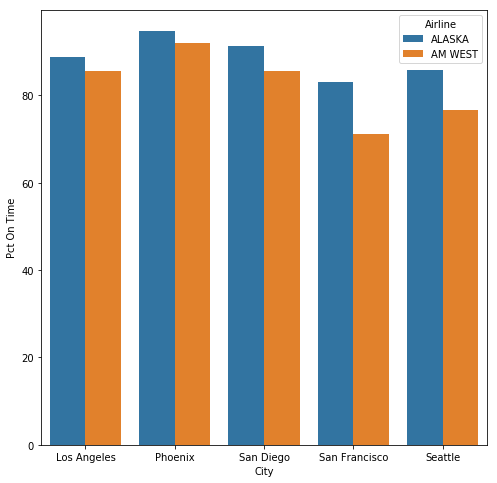

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x='City', y='Pct On Time',hue='Airline', data=sort_on_time); #creates bar plot by Airline and City

**Analysis:** Based on the results and the bar chart shown above, it shows that in every city, Alaska airlines performed better than AM West airline.

#### B: Which airline had the best overall on time performance? ####
To answer this question, the following steps were done:
1. Created a data frame that calculates the total number of flights by Airline.
2. Created a data frame that calculates the total number of on time flights only by Airline.
3. Merged two data frames on Airline and renamed number of flights column as Num_Flights_ontime and Num_Flights_total.
4. Created a new column for percentage of on time flights by Airline.
5. Created a bar to visualize the result.

In [15]:
#creates a data frame that calculates the total number of flights by Airline
l_sum_flights_air = l_airlines_df.groupby(['Airline']).sum()['Num_Flights'].to_frame()
l_sum_flights_air

,Num_Flights
Airline,
ALASKA,3775.0
AM WEST,7225.0


In [16]:
#creates a data frame that calculates the total number of on time flights only by Airline
on_time_air = l_airlines_df[l_airlines_df['Flight_Stats']=='on time'][['Airline','Num_Flights']].groupby(['Airline']).sum()['Num_Flights'].to_frame()
on_time_air

,Num_Flights
Airline,
ALASKA,3274.0
AM WEST,6438.0


In [17]:
#merges the two data frames created above
on_time_flights_air = pd.merge(on_time_air,l_sum_flights_air,on='Airline',suffixes=('_ontime','_total'))
on_time_flights_air

,Num_Flights_ontime,Num_Flights_total
Airline,,
ALASKA,3274.0,3775.0
AM WEST,6438.0,7225.0


In [18]:
#calculates percentage of on time flights by Airline
on_time_flights_air['Pct On Time'] = (on_time_flights_air.Num_Flights_ontime/on_time_flights_air.Num_Flights_total) * 100
on_time_flights_air

,Num_Flights_ontime,Num_Flights_total,Pct On Time
Airline,,,
ALASKA,3274.0,3775.0,86.728477
AM WEST,6438.0,7225.0,89.107266


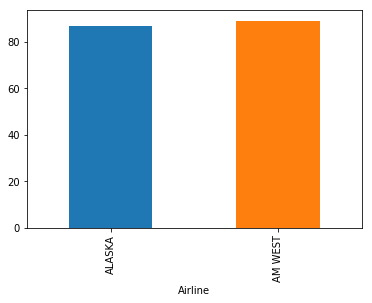

In [19]:
#creates a bar plot to visualize results
pct_on_time = on_time_flights_air['Pct On Time']
pct_on_time.plot.bar();

**Analysis:** Surprisingly, eventhough Alaska airlines performed better than AM West in all of the destination cities, overall, it is **AM West** had the **best overall ontime** performance.

### Task 4: Recommended Data Structure ###  

**Recommendation:** If given the task to change back the format of the data structure to a "wide" format, I will slightly modify the original structure by putting the ontime and delayed performance variable as a column instead of it being rows. For me, by doing it this way, you can easily compare the performance of the airlines by City and overall. As seen on the new format below, it is even easier to do analysis and calculate totals and percentages using this format. This can even be easily done on a spreadsheet like excel than the original format provided.

**Steps undertaken to change format to recommended format:**
1. Change to original format by creating a pivot table with Num_Flights as values, Airline and City as indexes, and destination cities as columns.
2. Unstacked the pivoted table by Flight_Stats column.

In [20]:
#pivot table to mimic original data structure
pivot_air = pd.pivot_table(l_airlines_df,values='Num_Flights',index=['Airline','Flight_Stats'],columns=['City'])
pivot_air

City                  Los Angeles  Phoenix  San Diego  San Francisco  Seattle
Airline Flight_Stats                                                         
ALASKA  delayed              62.0     12.0       20.0          102.0    305.0
        on time             497.0    221.0      212.0          503.0   1841.0
AM WEST delayed             117.0    415.0       65.0          129.0     61.0
        on time             694.0   4840.0      383.0          320.0    201.0

### Recommended Data Structure ###

In [21]:
#made Flight_Stats as columns per destination city
pivot_air.unstack('Flight_Stats')

City         Los Angeles         Phoenix         San Diego          \
Flight_Stats     delayed on time delayed on time   delayed on time   
Airline                                                              
ALASKA              62.0   497.0    12.0   221.0      20.0   212.0   
AM WEST            117.0   694.0   415.0  4840.0      65.0   383.0   

City         San Francisco         Seattle          
Flight_Stats       delayed on time delayed on time  
Airline                                             
ALASKA               102.0   503.0   305.0  1841.0  
AM WEST              129.0   320.0    61.0   201.0